In [ ]:
import os
import pandas as pd
def load_data():

  ################################################################################
  # Browse hard drive for accessing data files
  ################################################################################

  from google.colab import files
  IoTFpath = files.upload()


  #############
  ############

  Details = ('IoTEW20242.csv')
  IoTF  = pd.read_csv(Details)

  return IoTF

#https://medium.com/google-cloud/image-to-task-translator-using-multimodal-gemini-vision-pro-601f8eb3810c

In [ ]:
def setUp():

  from google.colab import drive
  drive.mount("mnt")
  %cd "mnt/My Drive/TechCore/Script"
  !pip install import-ipynb
  import import_ipynb
  import config

  #config.tcConfig.gen_config(). # need to run this only once

  try:
        config = config.tcConfig.load_config()
        userInput = input("Username: ")

        if userInput == "user":
            userPwd = input (f"Hello {userInput}, please enter your password: ")
            dataDir = config.get('data_dir')

            if (userPwd) != config.get('password'):
              print("Wrong")
              exit(0)





  except Exception as e:
        pass

  finally:
        #file_handler.close()
        pass

  return dataDir

In [ ]:
if __name__ == "__main__":

  ##########################
   ## loading config file ##
  ##########################

  dataDir = setUp()
  IoTF = load_data()

Mounted at mnt
/content/mnt/My Drive/TechCore/Script
importing Jupyter notebook from config.ipynb
Username: user
Hello user, please enter your password: 12345


In [ ]:
import json
IoTF['payload_data'] = IoTF['payload'].apply(json.loads)

temperature = IoTF['payload_data'].apply(lambda x: x[0]['M']['d']['M']['data']['M']['temperature']['N'])

# Similarly, you can access other values like humidity, devices, co2, and dt
humidity = IoTF['payload_data'].apply(lambda x: x[0]['M']['d']['M']['data']['M']['humidity']['N'])
devices = IoTF['payload_data'].apply(lambda x: x[0]['M']['d']['M']['data']['M']['devices']['N'])
co2 = IoTF['payload_data'].apply(lambda x: x[0]['M']['d']['M']['data']['M']['co2']['N'])
node = IoTF['payload_data'].apply(lambda x: x[0]['M']['d']['M']['node']['N'])
timestamp = IoTF['payload_data'].apply(lambda x: x[0]['M']['dt']['S'])


IoTF['temperature'] = temperature
IoTF['humidity'] = humidity
IoTF['devices'] = devices
IoTF['co2'] = co2
IoTF['node'] = node
IoTF['timestamp'] = timestamp

IoTF['temperature'] = IoTF['temperature'].apply(pd.to_numeric)
IoTF['humidity'] = IoTF['humidity'].apply(pd.to_numeric)
IoTF['devices'] = IoTF['devices'].apply(pd.to_numeric)
IoTF['co2'] = IoTF['co2'].apply(pd.to_numeric)
IoTF['node'] = IoTF['node'].apply(pd.to_numeric)
IoTF['timestamp'] = pd.to_datetime(timestamp)


In [ ]:
IoTF.shape

(100, 11)

In [ ]:
import numpy as np
import pandas as pd
df = pd.DataFrame(np.random.randint(20,25,size=(100, 1)), columns=(['SyntheticDevices']))

In [ ]:
df

,SyntheticDevices
0,24
1,23
2,24
3,20
4,24
...,...
95,23
96,24
97,23
98,21


In [ ]:
IoTF['SyntheticDevices'] = df['SyntheticDevices']

In [ ]:
IoTF

,deviceId,time,cpId,payload,payload_data,temperature,humidity,devices,co2,node,timestamp,SyntheticDevices
0,30,1710771734,8713C5E79DF346DBA1FC2F04A02192FD,"[{""M"":{""d"":{""M"":{""data"":{""M"":{""temperature"":{""...",[{'M': {'d': {'M': {'data': {'M': {'temperatur...,22.8,24.9,512,737,25,2024-03-18 14:22:10+00:00,24
1,30,1710771740,8713C5E79DF346DBA1FC2F04A02192FD,"[{""M"":{""d"":{""M"":{""data"":{""M"":{""temperature"":{""...",[{'M': {'d': {'M': {'data': {'M': {'temperatur...,22.9,27.4,8704,896,19,2024-03-18 14:22:20+00:00,23
2,30,1710771759,8713C5E79DF346DBA1FC2F04A02192FD,"[{""M"":{""d"":{""M"":{""data"":{""M"":{""temperature"":{""...",[{'M': {'d': {'M': {'data': {'M': {'temperatur...,22.4,24.8,8704,571,38,2024-03-18 14:22:39+00:00,24
3,30,1710771777,8713C5E79DF346DBA1FC2F04A02192FD,"[{""M"":{""d"":{""M"":{""data"":{""M"":{""temperature"":{""...",[{'M': {'d': {'M': {'data': {'M': {'temperatur...,22.2,26.8,512,684,18,2024-03-18 14:22:57+00:00,20
4,30,1710771786,8713C5E79DF346DBA1FC2F04A02192FD,"[{""M"":{""d"":{""M"":{""data"":{""M"":{""temperature"":{""...",[{'M': {'d': {'M': {'data': {'M': {'temperatur...,65.5,65.5,512,65535,24,2024-03-18 14:23:05+00:00,24
...,...,...,...,...,...,...,...,...,...,...,...,...
95,30,1710833079,8713C5E79DF346DBA1FC2F04A02192FD,"[{""M"":{""d"":{""M"":{""data"":{""M"":{""temperature"":{""...",[{'M': {'d': {'M': {'data': {'M': {'temperatur...,19.3,26.4,8704,402,38,2024-03-19 07:24:39+00:00,23
96,30,1710833119,8713C5E79DF346DBA1FC2F04A02192FD,"[{""M"":{""d"":{""M"":{""data"":{""M"":{""temperature"":{""...",[{'M': {'d': {'M': {'data': {'M': {'temperatur...,19.3,26.3,8704,487,20,2024-03-19 07:25:19+00:00,24
97,30,1710833129,8713C5E79DF346DBA1FC2F04A02192FD,"[{""M"":{""d"":{""M"":{""data"":{""M"":{""temperature"":{""...",[{'M': {'d': {'M': {'data': {'M': {'temperatur...,19.2,27.3,512,439,24,2024-03-19 07:25:28+00:00,23
98,30,1710833134,8713C5E79DF346DBA1FC2F04A02192FD,"[{""M"":{""d"":{""M"":{""data"":{""M"":{""temperature"":{""...",[{'M': {'d': {'M': {'data': {'M': {'temperatur...,19.5,29.5,8704,449,37,2024-03-19 07:25:33+00:00,21


In [ ]:
IoTF.set_index('timestamp', inplace=True)
resampledIoTF= IoTF.resample('5T').sum() #aggregating on 5 minutes



In [ ]:
grpIoTF = resampledIoTF.groupby(['timestamp','node']).sum().reset_index()
IoTF['node'].unique()

array([25, 19, 38, 18, 24, 20, 37, 17])

In [ ]:
IoTF[IoTF['node']== 38]

,deviceId,time,cpId,payload,payload_data,temperature,humidity,devices,co2,node,SyntheticDevices
timestamp,,,,,,,,,,,
2024-03-18 14:22:39+00:00,30,1710771759,8713C5E79DF346DBA1FC2F04A02192FD,"[{""M"":{""d"":{""M"":{""data"":{""M"":{""temperature"":{""...",[{'M': {'d': {'M': {'data': {'M': {'temperatur...,22.4,24.8,8704,571,38,24
2024-03-18 14:24:39+00:00,30,1710771880,8713C5E79DF346DBA1FC2F04A02192FD,"[{""M"":{""d"":{""M"":{""data"":{""M"":{""temperature"":{""...",[{'M': {'d': {'M': {'data': {'M': {'temperatur...,22.3,25.1,8704,599,38,22
2024-03-18 14:26:39+00:00,30,1710771999,8713C5E79DF346DBA1FC2F04A02192FD,"[{""M"":{""d"":{""M"":{""data"":{""M"":{""temperature"":{""...",[{'M': {'d': {'M': {'data': {'M': {'temperatur...,22.3,25.7,8704,644,38,20
2024-03-18 14:28:39+00:00,30,1710772120,8713C5E79DF346DBA1FC2F04A02192FD,"[{""M"":{""d"":{""M"":{""data"":{""M"":{""temperature"":{""...",[{'M': {'d': {'M': {'data': {'M': {'temperatur...,22.3,25.3,8704,583,38,24
2024-03-18 14:30:40+00:00,30,1710772240,8713C5E79DF346DBA1FC2F04A02192FD,"[{""M"":{""d"":{""M"":{""data"":{""M"":{""temperature"":{""...",[{'M': {'d': {'M': {'data': {'M': {'temperatur...,22.3,25.1,8704,551,38,20
2024-03-19 07:04:39+00:00,30,1710831883,8713C5E79DF346DBA1FC2F04A02192FD,"[{""M"":{""d"":{""M"":{""data"":{""M"":{""temperature"":{""...",[{'M': {'d': {'M': {'data': {'M': {'temperatur...,18.8,26.5,8704,371,38,22
2024-03-19 07:06:40+00:00,30,1710832000,8713C5E79DF346DBA1FC2F04A02192FD,"[{""M"":{""d"":{""M"":{""data"":{""M"":{""temperature"":{""...",[{'M': {'d': {'M': {'data': {'M': {'temperatur...,18.9,26.5,8704,374,38,22
2024-03-19 07:08:39+00:00,30,1710832119,8713C5E79DF346DBA1FC2F04A02192FD,"[{""M"":{""d"":{""M"":{""data"":{""M"":{""temperature"":{""...",[{'M': {'d': {'M': {'data': {'M': {'temperatur...,18.9,26.5,8704,367,38,22
2024-03-19 07:10:39+00:00,30,1710832239,8713C5E79DF346DBA1FC2F04A02192FD,"[{""M"":{""d"":{""M"":{""data"":{""M"":{""temperature"":{""...",[{'M': {'d': {'M': {'data': {'M': {'temperatur...,18.9,26.4,8704,358,38,24


In [ ]:
grpSort  = grpIoTF.sort_values(by='timestamp')
#grpSort  = grpSort.sort_values(by='node')

In [ ]:
grpSort.columns

Index(['timestamp', 'node', 'deviceId', 'time', 'cpId', 'payload',
       'payload_data', 'temperature', 'humidity', 'devices', 'co2',
       'SyntheticDevices'],
      dtype='object')

In [ ]:
grp82 = grpSort[grpSort['node'] == 82]
grp44 = grpSort[grpSort['node'] == 44]
grp100 = grpSort[grpSort['node'] == 100]
grp56 = grpSort[grpSort['node'] == 56]
grp81 = grpSort[grpSort['node'] == 81]
grp74 = grpSort[grpSort['node'] == 74]
grp75 = grpSort[grpSort['node'] == 75]
grp99 = grpSort[grpSort['node'] == 99]
grp25 = grpSort[grpSort['node'] == 25]

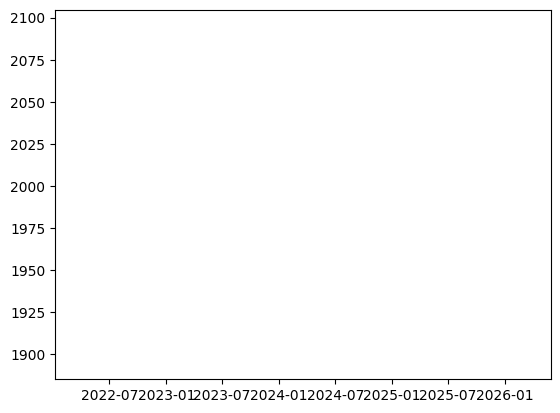

In [ ]:
import matplotlib.pyplot as plt
plt.plot(grp82['timestamp'],grp82['co2'], color='brown')
plt.plot(grp44['timestamp'],grp44['co2'], color='b')
plt.plot(grp100['timestamp'],grp100['co2'],color='purple')
#plt.plot(grp81['timestamp'],grp81['co2'],color='r')
#plt.plot(grp74['timestamp'],grp74['co2'],color='g')
plt.plot(grp75['timestamp'],grp75['co2'],color='pink')
plt.plot(grp99['timestamp'],grp99['co2'],color='r')
plt.plot(grp25['timestamp'],grp25['co2'],color='orange')

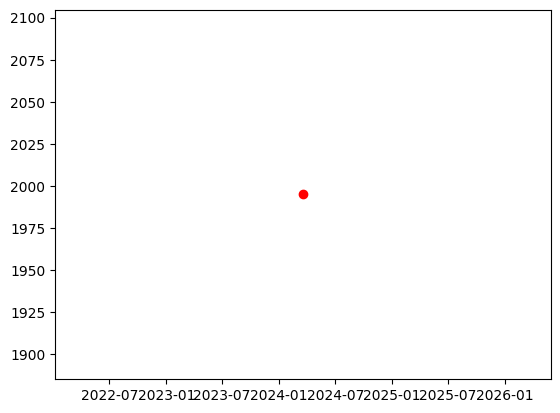

In [ ]:
plt.scatter(grp82['timestamp'],grp82['co2'], color='r')
plt.scatter(grp44['timestamp'],grp44['co2'], color='b')
plt.scatter(grp100['timestamp'],grp100['co2'],color='y')
#plt.plot(grp81['timestamp'],grp81['co2'],color='r')
#plt.scatter(grp74['timestamp'],grp74['co2'],color='g')
plt.scatter(grp75['timestamp'],grp75['co2'],color='pink')
plt.scatter(grp99['timestamp'],grp99['co2'],color='r')
plt.scatter(grp25['timestamp'],grp25['co2'],color='orange')

In [ ]:
grp82

,timestamp,node,deviceId,time,cpId,payload,payload_data,temperature,humidity,devices,co2,SyntheticDevices
2,2024-03-18 14:30:00+00:00,82,90,5132316673,8713C5E79DF346DBA1FC2F04A02192FD8713C5E79DF346...,"[{""M"":{""d"":{""M"":{""data"":{""M"":{""temperature"":{""...",[{'M': {'d': {'M': {'data': {'M': {'temperatur...,67.8,76.5,17920,1995,60


In [ ]:
grpSort['node'].unique()

array([281, 443,  82,   0,  56, 418, 462, 380, 371, 106])

In [ ]:

plt.scatter(b['timestamp'],b['co2'])
plt.legend()
plt.show()





NameError: name 'b' is not defined

In [ ]:
plt.scatter(IoTF['timestamp'],IoTF['humidity'] )
plt.legend()
plt.show()


In [ ]:
plt.plot(IoTF['humidity'], color = 'g',label='humidity')

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
IoTF

,deviceId,time,cpId,payload,payload_data,temperature,humidity,devices,co2,node,SyntheticDevices
timestamp,,,,,,,,,,,
2024-03-18 14:22:10+00:00,30,1710771734,8713C5E79DF346DBA1FC2F04A02192FD,"[{""M"":{""d"":{""M"":{""data"":{""M"":{""temperature"":{""...",[{'M': {'d': {'M': {'data': {'M': {'temperatur...,22.8,24.9,512,737,25,24
2024-03-18 14:22:20+00:00,30,1710771740,8713C5E79DF346DBA1FC2F04A02192FD,"[{""M"":{""d"":{""M"":{""data"":{""M"":{""temperature"":{""...",[{'M': {'d': {'M': {'data': {'M': {'temperatur...,22.9,27.4,8704,896,19,23
2024-03-18 14:22:39+00:00,30,1710771759,8713C5E79DF346DBA1FC2F04A02192FD,"[{""M"":{""d"":{""M"":{""data"":{""M"":{""temperature"":{""...",[{'M': {'d': {'M': {'data': {'M': {'temperatur...,22.4,24.8,8704,571,38,24
2024-03-18 14:22:57+00:00,30,1710771777,8713C5E79DF346DBA1FC2F04A02192FD,"[{""M"":{""d"":{""M"":{""data"":{""M"":{""temperature"":{""...",[{'M': {'d': {'M': {'data': {'M': {'temperatur...,22.2,26.8,512,684,18,20
2024-03-18 14:23:05+00:00,30,1710771786,8713C5E79DF346DBA1FC2F04A02192FD,"[{""M"":{""d"":{""M"":{""data"":{""M"":{""temperature"":{""...",[{'M': {'d': {'M': {'data': {'M': {'temperatur...,65.5,65.5,512,65535,24,24
...,...,...,...,...,...,...,...,...,...,...,...
2024-03-19 07:24:39+00:00,30,1710833079,8713C5E79DF346DBA1FC2F04A02192FD,"[{""M"":{""d"":{""M"":{""data"":{""M"":{""temperature"":{""...",[{'M': {'d': {'M': {'data': {'M': {'temperatur...,19.3,26.4,8704,402,38,23
2024-03-19 07:25:19+00:00,30,1710833119,8713C5E79DF346DBA1FC2F04A02192FD,"[{""M"":{""d"":{""M"":{""data"":{""M"":{""temperature"":{""...",[{'M': {'d': {'M': {'data': {'M': {'temperatur...,19.3,26.3,8704,487,20,24
2024-03-19 07:25:28+00:00,30,1710833129,8713C5E79DF346DBA1FC2F04A02192FD,"[{""M"":{""d"":{""M"":{""data"":{""M"":{""temperature"":{""...",[{'M': {'d': {'M': {'data': {'M': {'temperatur...,19.2,27.3,512,439,24,23


In [ ]:
IoTFCluster = IoTF


del IoTFCluster['payload_data']
del IoTFCluster['payload']
del IoTFCluster['cpId']
del IoTFCluster['deviceId']


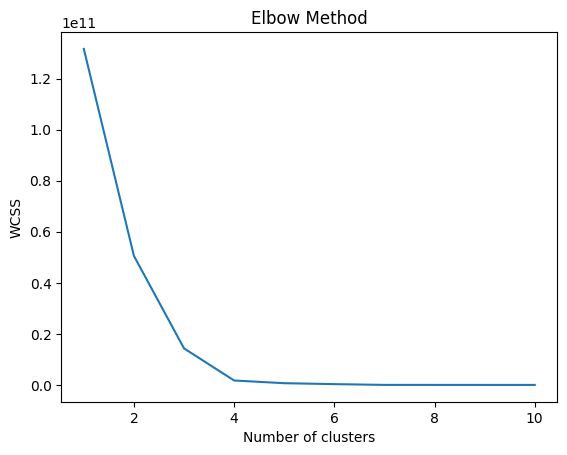

In [ ]:
# Perform k-Means Clustering with values of k from 1 to 10 and plot k v/s Within Cluster Sum of Squares
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=400, n_init=20, random_state=0)
    kmeans.fit(IoTFCluster)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# K-Means Clustering with 3 clusters
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=400, n_init=20, random_state=0)
kmeans.fit(IoTFCluster)
k_class = kmeans.predict(IoTFCluster)

In [ ]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(IoTFCluster)
PDF = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])

In [ ]:
# Add a column 'Class' to the data sets
PDF.loc[:, 'Cluster'] = pd.Series(k_class)
knowledge_class = IoTFCluster.copy()
knowledge_class['Class'] = k_class

In [ ]:
knowledge_class

,time,temperature,humidity,devices,co2,node,SyntheticDevices,Class
timestamp,,,,,,,,
2024-03-18 14:22:10+00:00,1710771734,22.8,24.9,512,737,25,24,1
2024-03-18 14:22:20+00:00,1710771740,22.9,27.4,8704,896,19,23,1
2024-03-18 14:22:39+00:00,1710771759,22.4,24.8,8704,571,38,24,1
2024-03-18 14:22:57+00:00,1710771777,22.2,26.8,512,684,18,20,1
2024-03-18 14:23:05+00:00,1710771786,65.5,65.5,512,65535,24,24,1
...,...,...,...,...,...,...,...,...
2024-03-19 07:24:39+00:00,1710833079,19.3,26.4,8704,402,38,23,0
2024-03-19 07:25:19+00:00,1710833119,19.3,26.3,8704,487,20,24,0
2024-03-19 07:25:28+00:00,1710833129,19.2,27.3,512,439,24,23,0


In [ ]:
PDF['Cluster'].value_counts()

Cluster
0    69
1    31
Name: count, dtype: int64

In [ ]:
IoTF['SyntheticDevices']

timestamp
2024-03-18 14:22:10+00:00    24
2024-03-18 14:22:20+00:00    23
2024-03-18 14:22:39+00:00    24
2024-03-18 14:22:57+00:00    20
2024-03-18 14:23:05+00:00    24
                             ..
2024-03-19 07:24:39+00:00    23
2024-03-19 07:25:19+00:00    24
2024-03-19 07:25:28+00:00    23
2024-03-19 07:25:33+00:00    21
2024-03-19 07:26:11+00:00    21
Name: SyntheticDevices, Length: 100, dtype: int64

In [ ]:
#knowledge_class['devices'].value_counts()
knowledge_class['SyntheticDevices'].value_counts()

SyntheticDevices
20    29
22    22
21    19
24    17
23    13
Name: count, dtype: int64

In [ ]:
PDF['Color'] = PDF['Cluster'].map({0 : 'red', 1 : 'blue', 2 : 'green'})

<ipython-input-33-2a115106b231>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(a1, a2, c = c1, alpha=0.3, cmap='viridis')


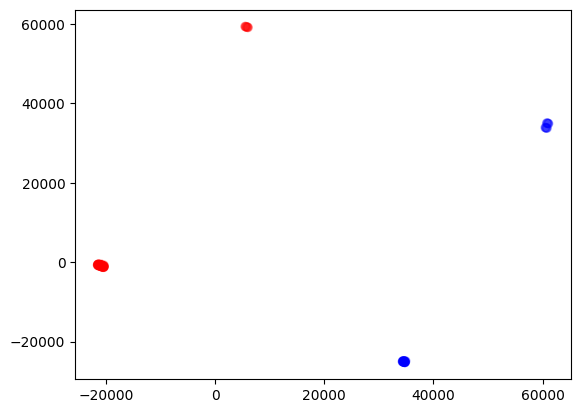

In [ ]:
# Plot the first 2 principal components and color by cluster
a1 = PDF['PC1']
a2 = PDF['PC2']
a3 = PDF['PC3']
c1 = PDF['Color']
plt.scatter(a1, a2, c = c1, alpha=0.3, cmap='viridis')

In [ ]:
knowledge_class.groupby(['Class']).mean()

,time,temperature,humidity,devices,co2,node,SyntheticDevices
Class,,,,,,,
0,1.710832e+09,587.282609,594.862319,5253.565217,6133.492754,25.985507,21.840580
1,1.710772e+09,870.793548,873.067742,5268.645161,17441.612903,26.000000,21.387097


In [ ]:
trainData = knowledge_class[['temperature', 'co2','node']]
testData = knowledge_class['SyntheticDevices']

In [ ]:
testData.shape

(100,)

In [ ]:
# Slipt the data into train and test data sets
X = trainData
Y = testData
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
X

,temperature,co2,node
timestamp,,,
2024-03-18 14:22:10+00:00,22.8,737,25
2024-03-18 14:22:20+00:00,22.9,896,19
2024-03-18 14:22:39+00:00,22.4,571,38
2024-03-18 14:22:57+00:00,22.2,684,18
2024-03-18 14:23:05+00:00,65.5,65535,24
...,...,...,...
2024-03-19 07:24:39+00:00,19.3,402,38
2024-03-19 07:25:19+00:00,19.3,487,20
2024-03-19 07:25:28+00:00,19.2,439,24


Text(0.5, 1.0, 'k v/s Accuracy for KNN')

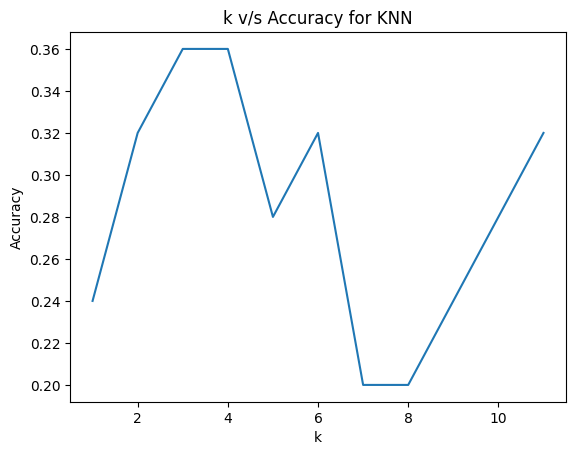

In [ ]:
# KNN for various values of k and plot of k v/s accuracy
from sklearn.neighbors import KNeighborsClassifier
accuracy = []
for i in range(1,12):
    knn = KNeighborsClassifier(n_neighbors = i).fit(xTrain, yTrain)
    accuracy.append(knn.score(xTest, yTest))

plt.plot(range(1,12), accuracy)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k v/s Accuracy for KNN')

In [ ]:
# KNN model and evaluation for optimal value of k (8 in this case)
knn = KNeighborsClassifier(n_neighbors = accuracy.index(max(accuracy))+1).fit(xTrain, yTrain)
knn_predictions = knn.predict(xTest)
knn_accuracy = knn.score(xTest, yTest)
knn_accuracy

0.36

In [ ]:
knn_CM = confusion_matrix(yTest, knn_predictions) # KNN Confusion Matrix
knn_CM

array([[9, 0, 0, 0, 0],
       [4, 0, 0, 1, 0],
       [4, 2, 0, 0, 0],
       [2, 0, 0, 0, 0],
       [2, 0, 1, 0, 0]])

In [ ]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

svm = SVC(kernel="rbf", gamma=0.7, C=1.0)
gnb = svm.fit(xTrain, yTrain)
gnb_predictions = svm.predict(xTest)
gnb_accuracy = svm.score(xTest, yTest)
gnb_accuracy

0.28

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
gnb = rf_classifier.fit(xTrain, yTrain)
gnb_predictions = rf_classifier.predict(xTest)
gnb_accuracy = rf_classifier.score(xTest, yTest)
gnb_accuracy

0.2

In [ ]:
# Gaussian Naive Bayes model and evaluation for optimal value of k
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(xTrain, yTrain)
gnb_predictions = gnb.predict(xTest)
gnb_accuracy = gnb.score(xTest, yTest)
gnb_accuracy

0.12